In [138]:
!pip install ipwhois

import pandas as pd
from ipwhois import IPWhois
import networkx as nx
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('Data_3.csv', names=['Type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling_rate'])
df.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048


In [86]:
df.shape

(69370, 20)

In [87]:
# Extract rows where column 'Type' is 'FLOW'
df = df[df['Type'] == 'FLOW']

In [88]:
df.shape
df.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048


# EXERCISE 4A: TOP TALKERS AND LISTENERS

In [94]:
# Function to get organization from IP address using IPWhois
def get_organization_from_ip(ip_address):
    ip = IPWhois(ip_address)
    result = ip.lookup_rdap()
    return result.get('network', {}).get('name')

In [135]:
# Group by 'src_IP' and count the occurrences
top_5 = df.groupby(['src_IP']).size().reset_index(name='# of packets').sort_values(by='# of packets', ascending=False).head(5)

# Apply the IPWhois lookup to the top 5 IPs only
top_5['Organization'] = top_5['src_IP'].apply(get_organization_from_ip)

top_5 = top_5.reset_index()

# Show the top 5 result
top_5

,index,src_IP,# of packets,Organization
0,1970,193.62.192.8,3041,EUR-BIO-INST
1,1143,155.69.160.32,2975,NTUNET1
2,431,130.14.250.11,2604,NLM-ETHER
3,760,14.139.196.58,2452,NKN-IIT-GUW
4,848,140.112.8.139,2056,T-NTU.EDU.TW-NET


In [136]:
# Group by 'src_IP' and count the occurrences
top_5 = df.groupby(['dst_IP']).size().reset_index(name='# of packets').sort_values(by='# of packets', ascending=False).head(5)

# Apply the IPWhois lookup to the top 5 IPs only
top_5['Organization'] = top_5['dst_IP'].apply(get_organization_from_ip)

top_5 = top_5.reset_index()

# Show the top 5 result
top_5

,index,dst_IP,# of packets,Organization
0,70,103.37.198.100,3841,A-STAR-AS-AP
1,680,137.132.228.15,3715,NUSNET
2,1806,202.21.159.244,2446,RPNET
3,1548,192.101.107.153,2368,PNNL
4,29,103.21.126.2,2056,IITB-IN


# EXERCISE 4B: TRANSPORT PROTOCOL 

In [ ]:
# Count the total number of packets
total_packets = len(df)

# Count the number of TCP and UDP packets
tcp_packets = len(df[df['IP_protocol'] == 6])
udp_packets = len(df[df['IP_protocol'] == 17])

# Calculate the percentage
tcp_percentage = (tcp_packets / total_packets) * 100
udp_percentage = (udp_packets / total_packets) * 100

# Create a new DataFrame with the desired structure
result_df = pd.DataFrame({
    'Header value': ['6', '17'],  # 6 for TCP and 17 for UDP
    'Transport Layer Protocol': ['TCP', 'UDP'],  # Corresponding transport protocols
    '# of packets': [tcp_packets, udp_packets],  # Number of TCP and UDP packets
    'Percentage %': [tcp_percentage, udp_percentage]
})

# Show the result DataFrame
result_df

# EXERCISE 4C: APPLICATIONS PROTOCOL

In [137]:
# Group by 'src_IP' and count the occurrences
top_5 = df.groupby(['udp_dst_port/tcp_dst_port/icmp_code']).size().reset_index(name='# of packets').sort_values(by='# of packets', ascending=False).head(5)

top_5 = top_5.reset_index()

# Show the top 5 result
top_5

,index,udp_dst_port/tcp_dst_port/icmp_code,# of packets
0,22,443,13423
1,10,80,2647
2,4799,52866,2068
3,3664,45512,1356
4,5276,56152,1341


# EXERCISE 4D: TRAFFIC 

In [127]:
sampled_total_traffic = sum(df['IP_size'])

total_traffic = sampled_total_traffic * 2048  # Scale by sampling rate to estimate actual traffic

total_traffic_Mb = total_traffic / (8 * pow(2, 20)) # Assuming IP_size is in number of bits

print(f"Total Traffic (Mb) = {total_traffic_Mb:.3f} Mb") 

Total Traffic (Mb) = 15814.898 Mb


# EXERCISE 4E: ADDITIONAL ANALYSIS 

Top 5 communication pairs

In [132]:
# Group by 'src_IP' and count the occurrences
grouped = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)

# Apply the IPWhois lookup to the top 5 IPs only
grouped['Source Organization'] = grouped['src_IP'].apply(get_organization_from_ip)
grouped['Destination Organization'] = grouped['dst_IP'].apply(get_organization_from_ip)

# Show the top 5 result
grouped

,src_IP,dst_IP,count,Source Organization,Destination Organization
3935,193.62.192.8,137.132.228.15,3041,EUR-BIO-INST,NUSNET
787,130.14.250.11,103.37.198.100,2599,NLM-ETHER,A-STAR-AS-AP
1319,14.139.196.58,192.101.107.153,2368,NKN-IIT-GUW,PNNL
1451,140.112.8.139,103.21.126.2,2056,T-NTU.EDU.TW-NET,IITB-IN
1109,137.132.228.15,193.62.192.8,1910,NUSNET,EUR-BIO-INST


Visualization of communications between different IP hosts

In [140]:
# Group by src_IP and dst_IP, count the occurrences, and sort by frequency
top_communication_pairs = (
    df.groupby(['src_IP', 'dst_IP'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(50)  # Get the top 50 pairs
)

top_communication_pairs.head()

,src_IP,dst_IP,count
3935,193.62.192.8,137.132.228.15,3041
787,130.14.250.11,103.37.198.100,2599
1319,14.139.196.58,192.101.107.153,2368
1451,140.112.8.139,103.21.126.2,2056
1109,137.132.228.15,193.62.192.8,1910


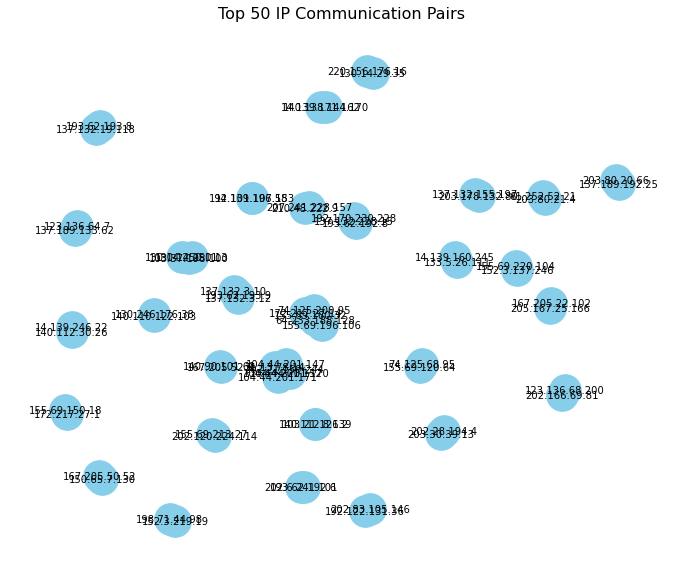

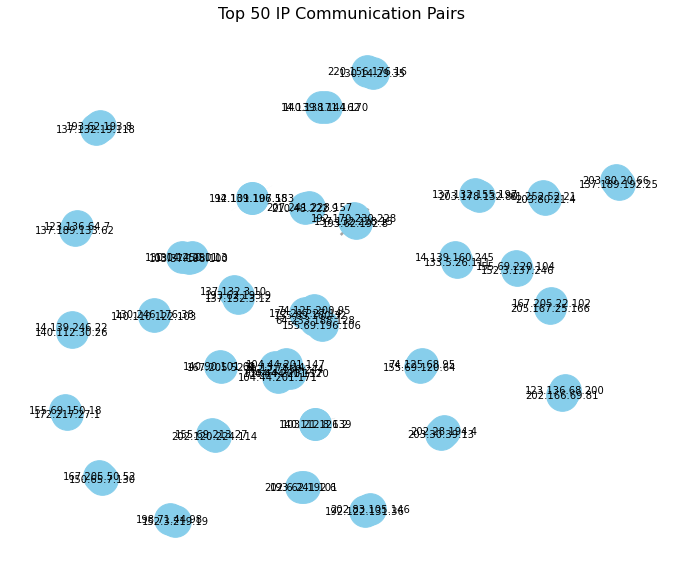

In [143]:
# Create a graph
G = nx.Graph()

# Add edges to the graph
for _, row in top_communication_pairs.iterrows():
    G.add_edge(row['src_IP'], row['dst_IP'], weight=row['count'])

# Normalize edge weights to control thickness (optional)
max_weight = max(nx.get_edge_attributes(G, 'weight').values())
edge_widths = [d['weight'] / max_weight * 5 for _, _, d in G.edges(data=True)]  # Scale factor to adjust width

# Draw the graph with proper edge rendering
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Spring layout for better distribution
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.8, width=edge_widths)  # Edge thickness scales with weight

plt.title("Top 50 IP Communication Pairs", fontsize=16)
plt.axis("off")
plt.show()# Create a graph
G = nx.Graph()

# Add edges to the graph based on top 50 communication pairs
for _, row in top_communication_pairs.iterrows():
    G.add_edge(row['src_IP'], row['dst_IP'], weight=row['count'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Spring layout for better visual distribution
edges = nx.draw_networkx_edges(
    G, pos, edge_color='gray', alpha=0.7, width=[d['weight'] / 50 for _, _, d in G.edges(data=True)]
)
nodes = nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
labels = nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Top 50 IP Communication Pairs", fontsize=16)
plt.axis("off")
plt.show()